In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [4]:
dataset = pd.read_csv('Data/dataset_spine_clean.csv')

In [38]:
dataset.columns

Index(['Unnamed: 0', 'pelvic_incidence', 'pelvic tilt',
       'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slop', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope',
       'label', 'label_val'],
      dtype='object')

Building our train and test datasets

In [39]:
X = pd.DataFrame(
        dataset.drop(axis=1, labels=['label', 'label_val']),
        columns=dataset.columns[:-2])

In [40]:
y = dataset.label_val

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=1)

We split our data in $\approx 33\%$ for validation and $\approx 66\%$ for training

In [42]:
len(X_test) / len(X_train)

0.33620689655172414

In [45]:
model1 = MLPClassifier(random_state=1, max_iter=10,verbose=True).fit(X_train, y_train)



Iteration 1, loss = 3.15757097
Iteration 2, loss = 1.28529423
Iteration 3, loss = 1.05462438
Iteration 4, loss = 0.49655784
Iteration 5, loss = 0.49332250
Iteration 6, loss = 0.51035197
Iteration 7, loss = 0.34932612
Iteration 8, loss = 0.19186984
Iteration 9, loss = 0.13699492
Iteration 10, loss = 0.13840442


C:\Users\novae\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
model1.score(X_test, y_test)


0.9358974358974359

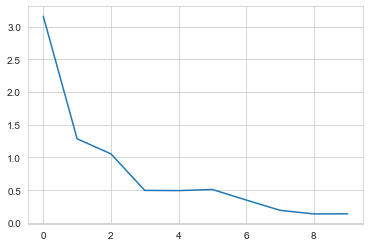

In [50]:
plt.plot(model1.loss_curve_)
plt.show()

In [51]:
y_pred = model1.predict(X_test)

Text(0.5, 16.0, 'Predicted Label')

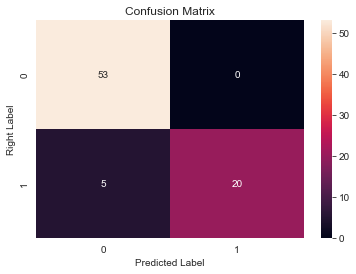

In [54]:
confMatrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(
        pd.DataFrame(confMatrix),
        annot=True
)
plt.title("Confusion Matrix")
plt.ylabel("Right Label")
plt.xlabel("Predicted Label")